In [141]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]
import tarfile
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer 
from collections import defaultdict

import numpy as np
import os
import glob
import seaborn as sns 
sns.set()
np.set_printoptions(linewidth=110)
pd.set_option('display.max_colwidth', 40)

LOCAL_PATH = "RACE/train/"

In [143]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('names')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gersa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [169]:
pattern = os.path.join(LOCAL_PATH + "middle",'*.txt')
files = glob.glob(pattern)
#pattern = os.path.join(LOCAL_PATH + "high",'*.txt')
#files += glob.glob(pattern)

In [170]:
dfs = [] # an empty list to store the data frames
for file in files:
    data = pd.read_json(file) # read data frame from json file
    dfs.append(data) # append the data frame to the list

In [171]:
df = pd.concat(dfs, ignore_index=True).drop("id", axis=1) # concatenate all the data frames in the list.
df.tail(5) ## middle tail is weird

,answers,options,questions,article
25416,C,"[Everyday, Twiceaday, Twiceaweek., T...",How often do most boys play basketball?,There are 45 students in our class. ...
25417,B,"[Becausetheyhavenotime., Becausethey...",Why do the girls dislike to play bas...,There are 45 students in our class. ...
25418,C,"[Everymorning., Everyafternoon, Ever...",When does Tony often run for 30 minu...,There are 45 students in our class. ...
25419,A,"[Threetimesamonth., Threetimesaweek....",How often does Gray swim in winter?,There are 45 students in our class. ...
25420,A,"[Becauseshedoesn'tliketoexercise., B...",Why is Sally so fat?,There are 45 students in our class. ...


## EDA: ARTICLES

In [172]:
articles = df["article"].drop_duplicates()

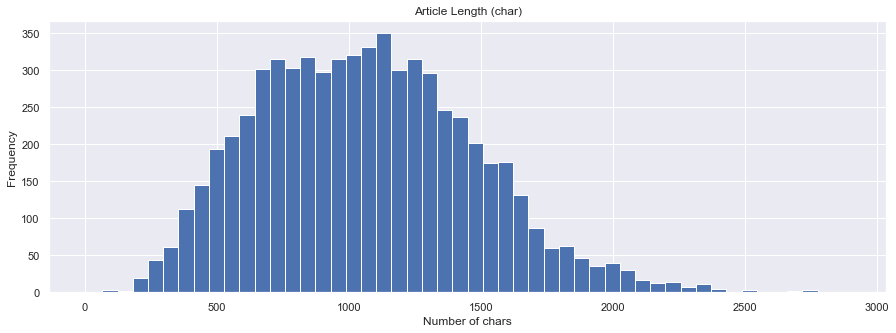

In [173]:
articles.apply(len).plot(kind="hist", bins=50)
plt.xlabel("Number of chars")
plt.title("Article Length (char)")
plt.show()

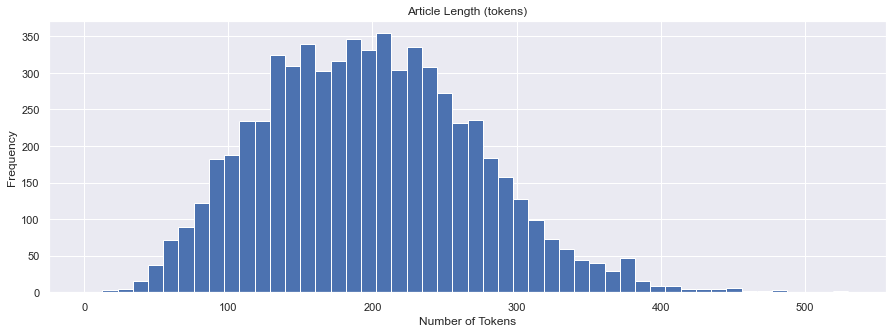

In [174]:
articles.apply(lambda x: len(x.split())).plot(kind="hist", bins=50)
plt.xlabel("Number of Tokens")
plt.title("Article Length (tokens)")
plt.show()

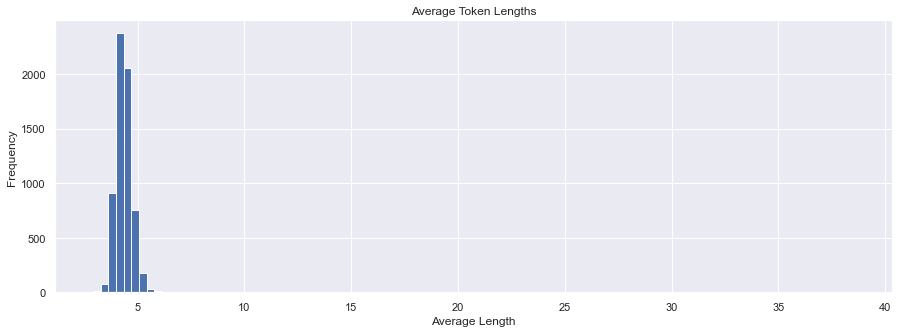

In [175]:
articles.apply(lambda x: np.mean([len(w) for w in x.split()])).plot(kind="hist", bins=100)
plt.xlabel("Average Length")
plt.title("Average Token Lengths")
plt.show()

In [176]:
stop_words = set(stopwords.words('english'))  
dict_stop = defaultdict(int)
for item in articles:
    for token in word_tokenize(item):
        if token in stop_words:
            dict_stop[token] += 1

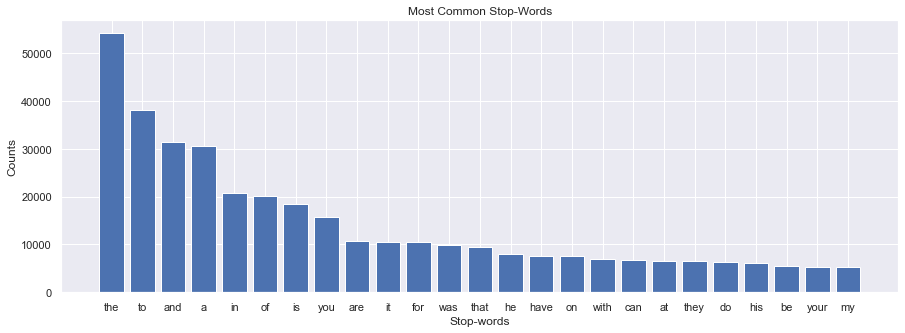

In [177]:
top = sorted(dict_stop.items(), key=lambda x:x[1],reverse=True)[:25] 
x,y = zip(*top)
plt.figure(figsize = (15,5))
plt.title("Most Common Stop-Words")
plt.xlabel("Stop-words")
plt.ylabel("Counts")
plt.bar(x,y)
plt.show()

In [178]:
fdist = FreqDist()
for item in articles:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            fdist[token.lower()] += 1

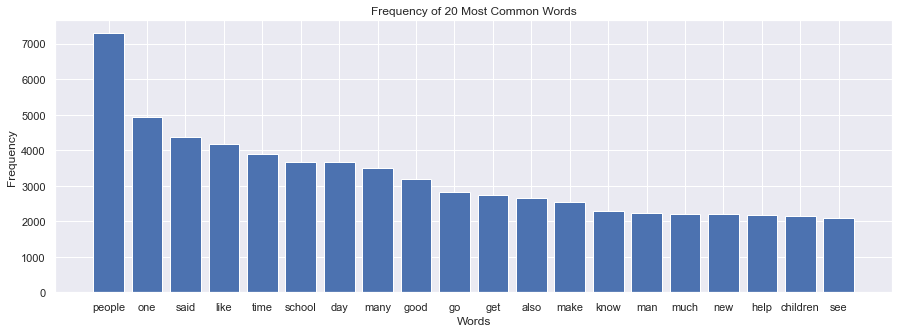

In [179]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Words')
plt.show()

In [180]:
lemmatizer = WordNetLemmatizer()
fdist = FreqDist()
for item in articles:
    for token in word_tokenize(item):
        if (token.lower() not in stop_words) and token.isalpha():
            token = lemmatizer.lemmatize(token.lower())
            fdist[token.lower()] += 1

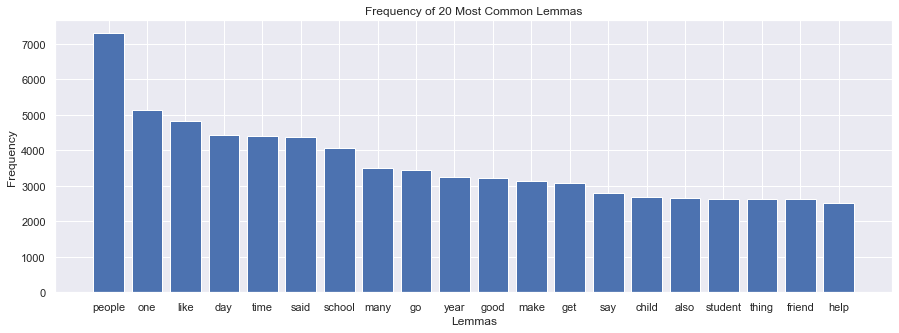

In [181]:
common = fdist.most_common(20)
x, y = zip(*common)
plt.bar(x, y)
plt.xlabel('Lemmas')
plt.ylabel('Frequency')
plt.title('Frequency of 20 Most Common Lemmas')
plt.show()

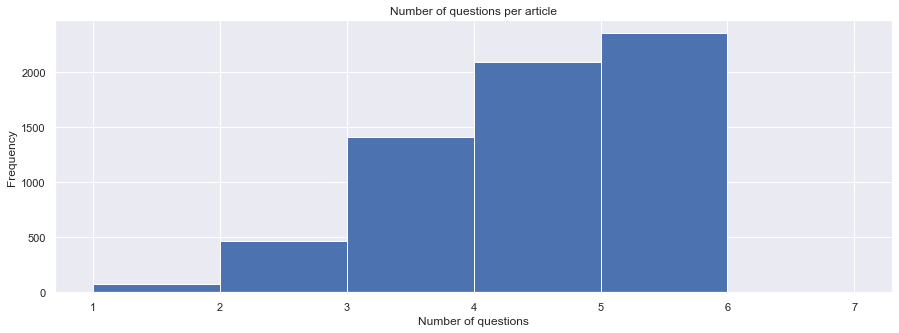

In [182]:
groupby = df[["article", "questions"]].groupby(["article"]).size().reset_index()
groupby.plot(kind="hist", legend=None, bins=6)
plt.title("Number of questions per article")
plt.xlabel("Number of questions")
plt.show()

In [92]:
df_formated = pd.concat([df["options"].apply(pd.Series).rename(columns = {0: "A", 1:"B", 2:"C", 3:"D"}), df],axis = 1)\
                .drop("options", axis = 1)

In [96]:
df_formated.tail(10)

,A,B,C,D,answers,questions,article
25411,at home,cooking,with Jimmy,shopping,D,"When the telephone rings, Mrs. Jones...",Mrs. Jones is waiting for an importa...
25412,the weather of New York,the transportation of New York,the people in New York,traffic accidents in New York,B,This passage is mainly about _ .,New York is a very large city with 8...
25413,subway,taxi,bus,car,A,The fastest way to travel in New Yor...,New York is a very large city with 8...
25414,subway,taxi,bus,car,B,The most expensive way to travel in ...,New York is a very large city with 8...
25415,From 8am to 10 am,From 3am to 10 pm,From 3 am to 5 pm,From 10 am to 3pm,D,If you travel in New York in your ow...,New York is a very large city with 8...
25416,Everyday,Twiceaday,Twiceaweek.,Twiceamonth.,C,How often do most boys play basketball?,There are 45 students in our class. ...
25417,Becausetheyhavenotime.,Becausetheythinkitisnoteasy.,Becausetheydon'tliketoplaywiththeboys.,Becausetheydon'tliketoexercise.,B,Why do the girls dislike to play bas...,There are 45 students in our class. ...
25418,Everymorning.,Everyafternoon,Everyeveningbeforehegoestobed.,Everyeveningbeforesupper,C,When does Tony often run for 30 minu...,There are 45 students in our class. ...
25419,Threetimesamonth.,Threetimesaweek.,Itisn'tmentionedinthepassage,Hardlyever,A,How often does Gray swim in winter?,There are 45 students in our class. ...
25420,Becauseshedoesn'tliketoexercise.,Becauseshelikestoeatjunkfoodverymuch.,"Becausesheeatstoomuchmeat,butdoesn't...","Becauseshedoesn'tliketoexercise,ands...",A,Why is Sally so fat?,There are 45 students in our class. ...


# EDA

### Archive

In [72]:
with open(files[-1],"r") as file:
    raw = file.read()
    print(raw)


{"answers": ["C", "B", "C", "A", "A"], "options": [["Everyday", "Twiceaday", "Twiceaweek.", "Twiceamonth."], ["Becausetheyhavenotime.", "Becausetheythinkitisnoteasy.", "Becausetheydon'tliketoplaywiththeboys.", "Becausetheydon'tliketoexercise."], ["Everymorning.", "Everyafternoon", "Everyeveningbeforehegoestobed.", "Everyeveningbeforesupper"], ["Threetimesamonth.", "Threetimesaweek.", "Itisn'tmentionedinthepassage", "Hardlyever"], ["Becauseshedoesn'tliketoexercise.", "Becauseshelikestoeatjunkfoodverymuch.", "Becausesheeatstoomuchmeat,butdoesn'texercise.", "Becauseshedoesn'tliketoexercise,andshelikestoeatjunkfood."]], "questions": ["How often do most boys play basketball?", "Why do the girls dislike to play basketball?", "When does Tony often run for 30 minutes?", "How often does Gray swim in winter?", "Why is Sally so fat?"], "article": "There are 45 students in our class. I have made a survey, 36 students say they like to exercise. Most boys play basketball together twice a week. But g

In [71]:
raw

'{"answers": ["C", "B", "C", "A", "A"], "options": [["Everyday", "Twiceaday", "Twiceaweek.", "Twiceamonth."], ["Becausetheyhavenotime.", "Becausetheythinkitisnoteasy.", "Becausetheydon\'tliketoplaywiththeboys.", "Becausetheydon\'tliketoexercise."], ["Everymorning.", "Everyafternoon", "Everyeveningbeforehegoestobed.", "Everyeveningbeforesupper"], ["Threetimesamonth.", "Threetimesaweek.", "Itisn\'tmentionedinthepassage", "Hardlyever"], ["Becauseshedoesn\'tliketoexercise.", "Becauseshelikestoeatjunkfoodverymuch.", "Becausesheeatstoomuchmeat,butdoesn\'texercise.", "Becauseshedoesn\'tliketoexercise,andshelikestoeatjunkfood."]], "questions": ["How often do most boys play basketball?", "Why do the girls dislike to play basketball?", "When does Tony often run for 30 minutes?", "How often does Gray swim in winter?", "Why is Sally so fat?"], "article": "There are 45 students in our class. I have made a survey, 36 students say they like to exercise. Most boys play basketball together twice a week

In [39]:
df

,answers,options,questions,article,id
0,D,"[Help his mother., Watch TV., Wear his raincoat, Go out.]",What does Robbie want to do on the rainy day?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
1,A,"[happy, scary, dangerous, boring]",Robbie has a_day that day.,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
2,B,"[The raincoat can stop the rain., The color of Robbie's raincoat is red., Robbie first watches with his Mum, Robbie's mum doesn't wear a raincoat in the rain.]",Which of the following is TRUE according to the passage?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt
3,B,"[It's raining, Fun in the rain, Robbie and His mother, Robbie's raincoat]",Which is the best title for the passage?,"Pit-a-pat. Pit-a-pat. It's raining. ""I want to go outside and play, Mum,"" Robbie says, ""When can the rain stop?"" His mum doesn't know what to say. She hopes the rain can stop, too. ""You can watch TV with me,"" she says. ""No, I just want to go outside."" ""1Put on your raincoat."" ""Does it stop raining?"" ""No, but you can go outside and play in the rain. Do you like that?"" ""Yes, mum."" He runs to his bedroom and puts on his red raincoat. ""Here you go. Go outside and play."" Mum opens the door and says. Robbie runs into the rain. Water goes 2here and there. Robbie's mum watches her son. He is having so much fun. ""Mum, come and play with me!"" Robbie calls. The door opens and his mum walks out. She is in her yellow raincoat. Mother and son are out in the rain for a long time. They play all kinds of games in the rain.",middle10.txt


In [26]:
with open("RACE/train/middle/10.txt") as file:
    print(file.read())

{"answers": ["D", "A", "B", "B"], "options": [["Help his mother.", "Watch TV.", "Wear his raincoat", "Go out."], ["happy", "scary", "dangerous", "boring"], ["The raincoat can stop the rain.", "The color of Robbie's raincoat is red.", "Robbie first watches with his Mum", "Robbie's mum doesn't wear a raincoat in the rain."], ["It's raining", "Fun in the rain", "Robbie and His mother", "Robbie's raincoat"]], "questions": ["What does Robbie want to do on the rainy day?", "Robbie has a_day that day.", "Which of the following is TRUE according to the passage?", "Which is the best title for the passage?"], "article": "Pit-a-pat. Pit-a-pat. It's raining. \"I want to go outside and play, Mum,\" Robbie says, \"When can the rain stop?\" His mum doesn't know what to say. She hopes the rain can stop, too. \"You can watch TV with me,\" she says. \"No, I just want to go outside.\" \"1Put on your raincoat.\" \"Does it stop raining?\" \"No, but you can go outside and play in the rain. Do you like that?